In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_differential_equations(a, b, c, d, R0, J0, T, dt=0.01):
    num_steps = int(T / dt) + 1
    t = np.linspace(0, T, num_steps)
    R = np.zeros(num_steps)
    J = np.zeros(num_steps)
    
    R[0] = R0
    J[0] = J0
    
    for i in range(1, num_steps):
        dR_dt = a * R[i-1] + b * J[i-1]
        dJ_dt = c * R[i-1] + d * J[i-1]
        
        R[i] = R[i-1] + dR_dt * dt
        J[i] = J[i-1] + dJ_dt * dt
    
    data = pd.DataFrame({'t': t, 'R': R, 'J': J})
    return data

def plot_results(data, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(data['t'], data['R'], label='R(t)')
    plt.plot(data['t'], data['J'], label='J(t)')
    plt.xlabel('Time t')
    plt.ylabel('Value')
    plt.title(f'{title}: R(t), J(t)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(data['R'], data['J'])
    plt.xlabel('R(t)')
    plt.ylabel('J(t)')
    plt.title(f'{title}: (R, J)')

    plt.tight_layout()
    plt.show()

def plot_vector_field(a, b, c, d, title):
    R = np.linspace(-10, 10, 20)
    J = np.linspace(-10, 10, 20)
    R, J = np.meshgrid(R, J)
    
    dR = a * R + b * J
    dJ = c * R + d * J
    
    plt.figure(figsize=(8, 8))
    plt.quiver(R, J, dR, dJ, scale=50)
    plt.xlabel('R')
    plt.ylabel('J')
    plt.title(f'{title}:velocity vector field (dR/dt, dJ/dt)')
    plt.grid()
    plt.show()

def run_simulation(a, b, c, d, R0, J0, T, title):
    data = simulate_differential_equations(a, b, c, d, R0, J0, T)
    plot_results(data, title)
    plot_vector_field(a, b, c, d, title)

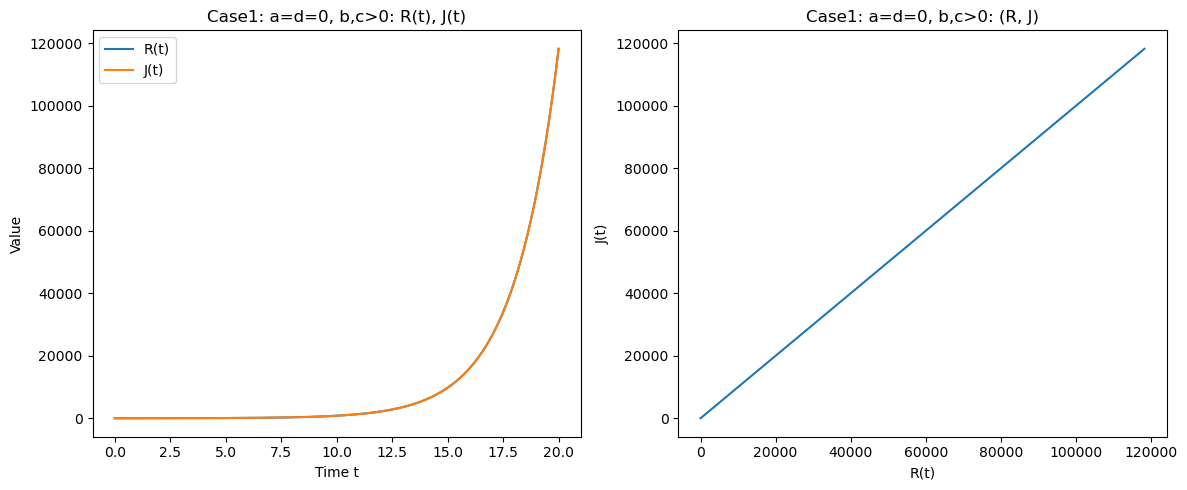

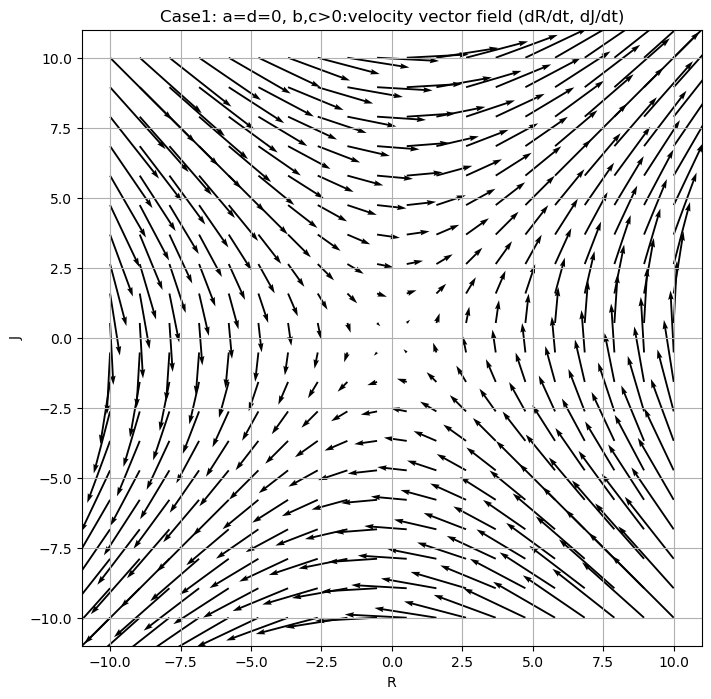

In [49]:
# ケース1: a=d=0, b,c>0
a, d = 0, 0
b, c = 0.5, 0.5
R0, J0 = 1.0, 10.0
T = 20.0

run_simulation(a, b, c, d, R0, J0, T, "Case1: a=d=0, b,c>0")

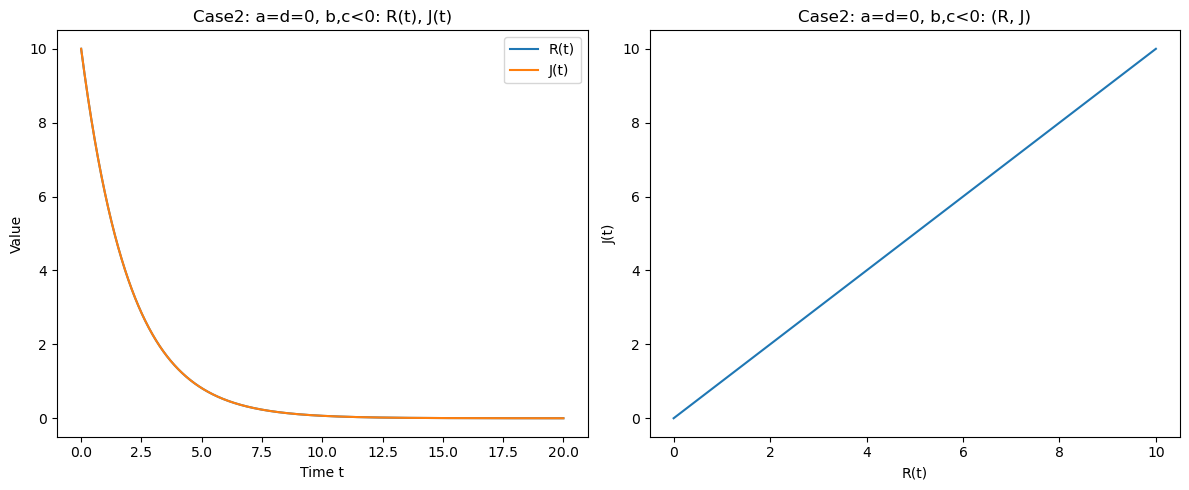

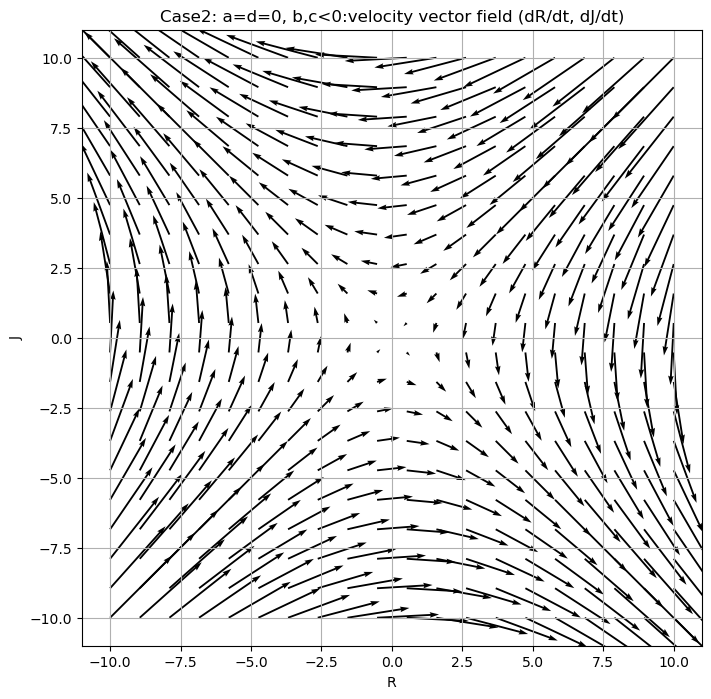

In [55]:
# ケース2: a=d=0, b,c<0
a, d = 0, 0
b, c = -0.5, -0.5
R0, J0 = 10, 10
T = 20.0

run_simulation(a, b, c, d, R0, J0, T, "Case2: a=d=0, b,c<0")

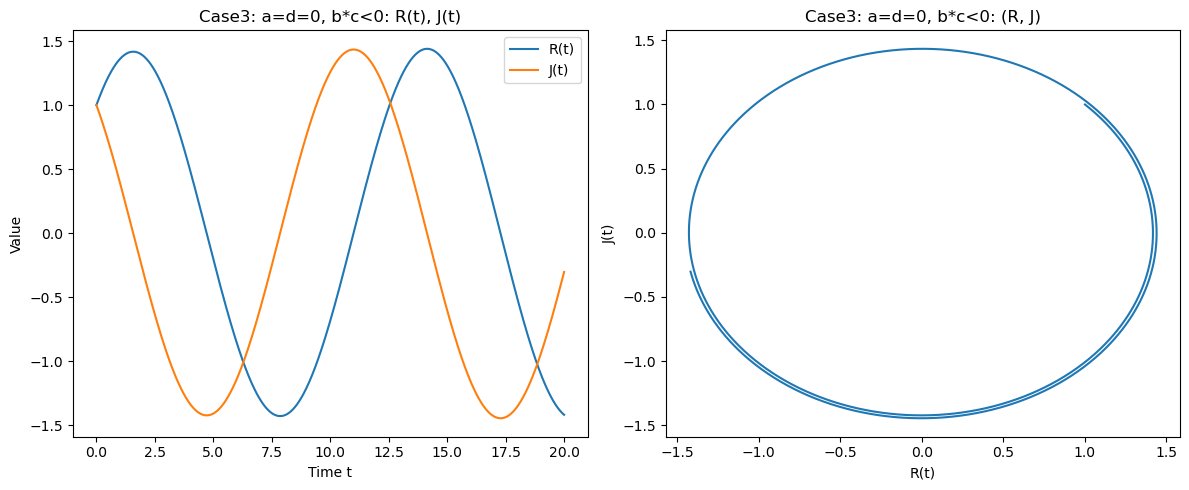

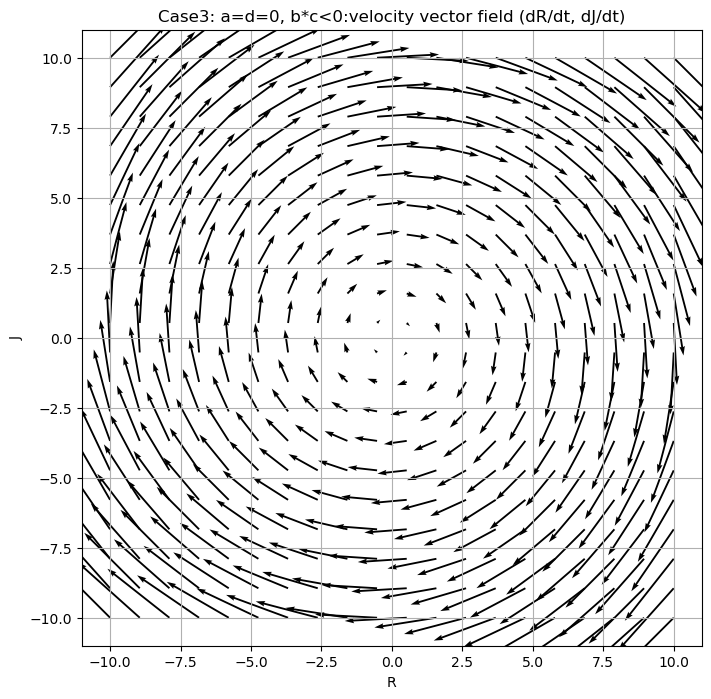

In [44]:
# ケース3: a=d=0, b*c<0
a, d = 0, 0
b, c = 0.5, -0.5
R0, J0 = 1.0, 1.0
T = 20.0

run_simulation(a, b, c, d, R0, J0, T, "Case3: a=d=0, b*c<0")

/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gotokenichiro/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12511 (\N{KATAKANA L

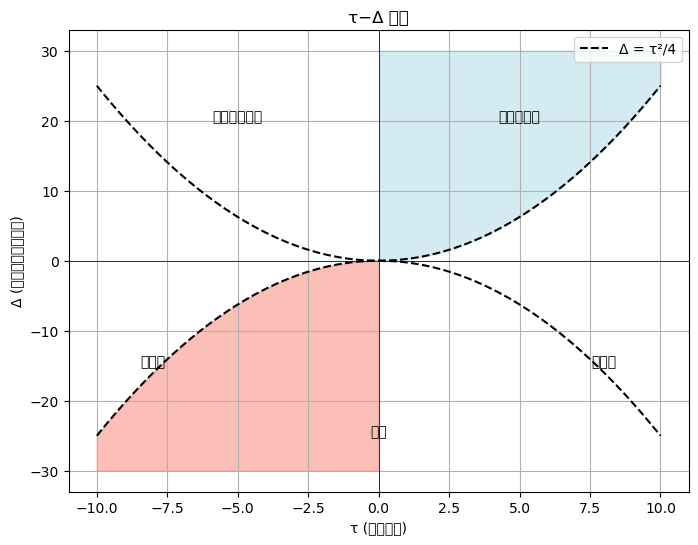

In [56]:
# 課題1-3
import numpy as np
import matplotlib.pyplot as plt

def classify_equilibrium(tau, delta):
    """
    τ−∆平面上の点に基づいて平衡点の種類を分類する関数
    """
    if delta > 0:
        if tau**2 - 4*delta > 0:
            return '実異なる実数固有値 (ノード)'
        elif tau**2 - 4*delta == 0:
            return '重解の実数固有値 (鞍点)'
        else:
            return '複素共役の固有値 (螺旋点)'
    elif delta < 0:
        return '複素共役の固有値 (螺旋点)'
    else:  # delta == 0
        return '重解の実数固有値 (鞍点)'

def plot_phase_diagram():
    """
    τ−∆平面の相図をプロットする関数
    """
    tau = np.linspace(-10, 10, 400)
    delta = np.linspace(-30, 30, 400)
    Tau, Delta = np.meshgrid(tau, delta)
    
    plt.figure(figsize=(8, 6))
    
    # 分類領域のプロット
    # 実数固有値かつ安定/不安定
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    # 分類の境界線
    plt.plot(tau, tau**2 / 4, 'k--', label='Δ = τ²/4')
    plt.plot(tau, -tau**2 / 4, 'k--')
    
    # ラベル付け
    plt.text(5, 20, '安定ノード', horizontalalignment='center')
    plt.text(-5, 20, '不安定ノード', horizontalalignment='center')
    plt.text(0, -25, '鞍点', horizontalalignment='center')
    plt.text(-8, -15, '螺旋点', horizontalalignment='center')
    plt.text(8, -15, '螺旋点', horizontalalignment='center')
    
    # 塗り分け
    plt.fill_between(tau, tau**2 / 4, 30, where=(delta > tau**2 / 4), color='lightblue', alpha=0.5)
    plt.fill_between(tau, -tau**2 / 4, tau**2 / 4, where=(delta < tau**2 / 4) & (delta > -tau**2 / 4), color='lightgreen', alpha=0.5)
    plt.fill_between(tau, -30, -tau**2 / 4, where=(delta < -tau**2 / 4), color='salmon', alpha=0.5)
    
    plt.xlabel('τ (トレース)')
    plt.ylabel('Δ (ディターミナント)')
    plt.title('τ−Δ 相図')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_phase_diagram()